Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeClassifier, указав максимальную глубину дерева равную 2.



In [1]:
#подключаю гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn import tree #импортируем библиотеку с деревьями

In [3]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')

In [5]:
df_cut=df[['Hair length','Shoe size','Sex']]
df_cut=df_cut.dropna()

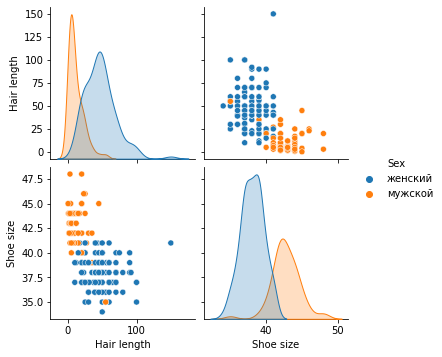

In [6]:
sns.pairplot(df_cut, hue='Sex')

In [7]:
#создаем модель
model=tree.DecisionTreeClassifier(max_depth=2) #здесь мы можем задавать количество уровней дерева max_depth
#большое количество уровней не всегда хорошо сказывается на результате, переобучаемость модели может снижать ее точность
#обучаем нашу модель
model.fit(df_cut[['Hair length','Shoe size']].values.reshape(-1,2), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=2)

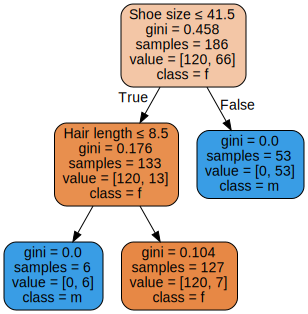

In [9]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['Hair length','Shoe size'],
                                class_names=['f', 'm'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [10]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Hair length','Shoe size','Sex']]
df_test_cut=df_test_cut.dropna() #удаляем данные, имеющие пустые значения

In [11]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Hair length','Shoe size']].values.reshape(-1,2))

In [12]:
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,2
мужской,1,34


In [13]:
#Для более наглядной визуализации запишем следующий код:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

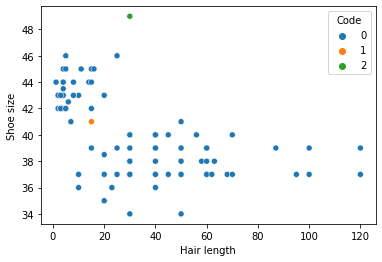

In [14]:
sns.scatterplot(data=df_test_cut, x='Hair length', y='Shoe size', hue='Code')

In [15]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.96825397, 0.97142857]),
 array([0.98387097, 0.94444444]),
 array([0.976     , 0.95774648]),
 array([62, 36]))